# 9 Head poses Model Training

Neural Network model for a quick Head Pose estimation, using just facial points as input. The model was made for real-time control of a Pan-Tilt camera using face movements as the control signal. 

### Load dependencies, set random seed for reproducibility

In [2]:
import numpy as np
import pandas as pd
np.random.seed(14)

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

from keras.layers import Dropout, Activation, Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling1D
from keras.layers.normalization import BatchNormalization 
from keras import regularizers 
from keras.layers.convolutional import Conv1D

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import array

Using TensorFlow backend.


### Read and preprocess the dataset

In [4]:
dfCenter = pd.read_csv('datasets/face_center.csv')
dfCenter2 = pd.read_csv('datasets/face_center2.csv')
dfCenter = dfCenter.append(dfCenter2, ignore_index = True)

dfRight = pd.read_csv('datasets/face_right.csv')
dfRight2 = pd.read_csv('datasets/face_right2.csv')
dfRight = dfRight.append(dfRight2, ignore_index = True)

dfLeft = pd.read_csv('datasets/face_left.csv')
dfLeft2 = pd.read_csv('datasets/face_left2.csv')
dfLeft = dfLeft.append(dfLeft2, ignore_index = True)

dfUp = pd.read_csv('datasets/face_up.csv')
dfUp2 = pd.read_csv('datasets/face_up2.csv')
dfUp = dfUp.append(dfUp2, ignore_index = True)

dfDown = pd.read_csv('datasets/face_down.csv')
dfDown2 = pd.read_csv('datasets/face_down2.csv')
dfDown = dfDown.append(dfDown2, ignore_index = True)

dfUpRight = pd.read_csv('datasets/face_up_right.csv')
dfUpRight2 = pd.read_csv('datasets/face_up_right2.csv')
dfUpRight = dfUpRight.append(dfUpRight2, ignore_index = True)

dfUpLeft = pd.read_csv('datasets/face_up_left.csv')
dfUpLeft2 = pd.read_csv('datasets/face_up_left2.csv')
dfUpLeft = dfUpLeft.append(dfUpLeft2, ignore_index = True)

dfDownRight = pd.read_csv('datasets/face_down_right.csv')
dfDownRight2 = pd.read_csv('datasets/face_down_right2.csv')
dfDownRight = dfDownRight.append(dfDownRight2, ignore_index = True)

dfDownLeft = pd.read_csv('datasets/face_down_left.csv')
dfDownLeft2 = pd.read_csv('datasets/face_down_left2.csv')
dfDownLeft = dfDownLeft.append(dfDownLeft2, ignore_index = True)

columns = list(dfCenter)

dfCenter['RESULT'] = 0
dfRight['RESULT'] = 1
dfLeft['RESULT'] = 2
dfUp['RESULT'] = 3
dfDown['RESULT'] = 4
dfUpRight['RESULT'] = 5
dfUpLeft['RESULT'] = 6
dfDownRight['RESULT'] = 7
dfDownLeft['RESULT'] = 8


df = dfCenter.append(dfRight, ignore_index=True).append(dfLeft, ignore_index = True)
df = df.append(dfUp, ignore_index = True).append(dfDown, ignore_index = True)
df = df.append(dfUpRight, ignore_index = True).append(dfUpLeft, ignore_index = True)
df = df.append(dfDownRight, ignore_index = True).append(dfDownLeft, ignore_index = True)


print(df.shape)

(9000, 61)


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,RESULT
8995,1.0,0.870639,0.778903,0.725278,0.680233,0.661416,0.679687,0.725736,0.733129,0.697956,...,0.440451,0.461847,0.483469,0.492717,0.535039,0.545349,0.529865,0.501872,0.437781,8
8996,1.0,0.873671,0.781486,0.735074,0.683443,0.655249,0.673143,0.724177,0.729398,0.696364,...,0.465730,0.481957,0.495796,0.492139,0.528186,0.541326,0.529552,0.497978,0.431634,8
8997,1.0,0.877431,0.790890,0.744683,0.692465,0.664408,0.677805,0.718668,0.727266,0.696576,...,0.448371,0.470152,0.488073,0.494257,0.521760,0.529427,0.515435,0.493970,0.433165,8
8998,1.0,0.881703,0.792698,0.741344,0.697454,0.673473,0.686590,0.721158,0.718938,0.687107,...,0.426923,0.447417,0.465064,0.479192,0.519957,0.540319,0.528465,0.506383,0.439765,8
8999,1.0,0.881703,0.794662,0.747706,0.701630,0.679918,0.693795,0.731132,0.732642,0.692457,...,0.448210,0.467434,0.485004,0.482802,0.528204,0.543669,0.532557,0.512542,0.446091,8


In [6]:
np_arr = df.values

In [7]:
np_arr.shape

(9000, 61)

### Define input data and desired output, and then split training and test observations

In [8]:
X = df[columns]
y = df['RESULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=14)

c = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')

n_classes = 9
#one hot encoding
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

print (y_test[:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [9]:
X_train_np = X_train.values 
Y_train_np = y_train

In [10]:
X = np.array(X_train).astype('float32')
Y = np.array(y_train)
len(X)

7200

In [11]:
print(X_test.shape)
print(y_test.shape)
X_train_np = np.expand_dims(X_train_np, axis=2)
print(X_train_np.shape)
X_test = np.expand_dims(X_test, axis=2)
print(X_test.shape)
#Y_train_np = np.expand_dims(Y_train_np, axis=2)
Y_train_np.shape

(1800, 60)
(1800, 9)
(7200, 60, 1)
(1800, 60, 1)


(7200, 9)

### Define Neural Network architecture

In [22]:
def create_dense(layer_sizes):
    model = Sequential()

    model.add(Conv1D(32, 3, padding ='same', input_shape=(60,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(64, 3, padding ='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(64, 3, padding ='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2))
  
    model.add(GlobalAveragePooling1D())
  
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(9, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=0.00125),
                  metrics=['accuracy'])
    return model

def evaluate(model, batch_size=128, epochs=100):
    model.summary()
    history = model.fit(X_train_np, Y_train_np, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
    loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 60, 32)            128       
_________________________________________________________________
batch_normalization_16 (Batc (None, 60, 32)            128       
_________________________________________________________________
activation_16 (Activation)   (None, 60, 32)            0         
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 30, 32)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 30, 64)            6208      
_________________________________________________________________
batch_normalization_17 (Batc (None, 30, 64)            256       
_________________________________________________________________
activation_17 (Activation)   (None, 30, 64)            0         
__________

7200/7200 [==============================] - 6s 890us/step - loss: 0.7709 - acc: 0.8279 - val_loss: 0.6143 - val_acc: 0.9272
Epoch 41/100
7200/7200 [==============================] - 7s 905us/step - loss: 0.7443 - acc: 0.8374 - val_loss: 0.5955 - val_acc: 0.9289
Epoch 42/100
7200/7200 [==============================] - 6s 884us/step - loss: 0.7246 - acc: 0.8428 - val_loss: 0.5781 - val_acc: 0.9289
Epoch 43/100
7200/7200 [==============================] - 7s 963us/step - loss: 0.7049 - acc: 0.8410 - val_loss: 0.5592 - val_acc: 0.9306
Epoch 44/100
7200/7200 [==============================] - 7s 913us/step - loss: 0.6998 - acc: 0.8494 - val_loss: 0.5413 - val_acc: 0.9339
Epoch 45/100
7200/7200 [==============================] - 6s 899us/step - loss: 0.6748 - acc: 0.8579 - val_loss: 0.5245 - val_acc: 0.9317
Epoch 46/100
7200/7200 [==============================] - 6s 894us/step - loss: 0.6626 - acc: 0.8571 - val_loss: 0.5084 - val_acc: 0.9328
Epoch 47/100
7200/7200 [=======================

7200/7200 [==============================] - 6s 883us/step - loss: 0.2842 - acc: 0.9440 - val_loss: 0.1904 - val_acc: 0.9594
Epoch 100/100
7200/7200 [==============================] - 6s 881us/step - loss: 0.2832 - acc: 0.9435 - val_loss: 0.1866 - val_acc: 0.9617
Test loss: 0.187
Test accuracy: 0.962


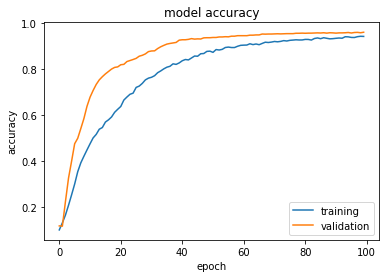

In [23]:
# for layers in range(1, 5):
model = create_dense([32] * 5)
evaluate(model)

### Configure the model

In [ ]:
        # model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.00125), metrics=['accuracy'])

### Train the model

In [ ]:
# model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test))
def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.00125), metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

    loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['training', 'validation'], loc='best')
# plt.show()

    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


### Saving the model

In [ ]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

# model.save('model/model_9_positions.h5')